In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ruptures as rpt
import pandas as pd
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.log.importer.xes import importer as xes_importer
from datetime import date
from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import seaborn as sns
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [33]:
import pm4py
import os
import datetime
#log = pm4py.read_xes("../../data/Sample2000BPIChallenge2017.xes")
from pm4py.algo.discovery.batches import algorithm
#batches = algorithm.apply(log)
batchespm4py = set()
for act_res in batches:
    if act_res[0][0]=='O_Accepted' or  act_res[0][0]=='O_Refused' or  act_res[0][0]=='A_Cancelled':
        print("activity: "+act_res[0][0]+" resource: "+act_res[0][1])
        print("number of distinct batches: "+str(act_res[1]))
        for batch_type in act_res[2]:
            print(batch_type, len(act_res[2][batch_type]))
            for batch_info in act_res[2][batch_type]:
                print(datetime.datetime.fromtimestamp(batch_info[0]),'to ', datetime.datetime.fromtimestamp(batch_info[1]))
                batchespm4py.add(datetime.datetime.fromtimestamp(batch_info[1]))

activity: A_Cancelled resource: User_1
number of distinct batches: 143
Concurrent batching 143
2016-02-13 08:00:35.890000 to  2016-02-13 08:00:50.506000
2016-02-23 08:00:43.166000 to  2016-02-23 08:00:45.171000
2016-02-29 08:00:14.998000 to  2016-02-29 08:02:25.679000
2016-03-03 08:00:44.773000 to  2016-03-03 08:01:13.239000
2016-03-04 08:00:28.085000 to  2016-03-04 08:00:39.274000
2016-03-05 08:00:49.325000 to  2016-03-05 08:00:55.708000
2016-03-07 08:00:33.757000 to  2016-03-07 08:01:02.245000
2016-03-10 08:00:30.809000 to  2016-03-10 08:00:53.473000
2016-03-11 08:00:44.653000 to  2016-03-11 08:00:47.567000
2016-03-12 08:08:10.722000 to  2016-03-12 08:08:20.537000
2016-03-13 08:00:35.582000 to  2016-03-13 08:00:57.452000
2016-03-17 08:00:17.192000 to  2016-03-17 08:00:48.080000
2016-03-18 08:00:36.661000 to  2016-03-18 08:00:45.953000
2016-03-19 08:08:57.403000 to  2016-03-19 08:09:28.356000
2016-03-24 08:00:23.108000 to  2016-03-24 08:00:49.347000
2016-03-25 08:00:19.014000 to  2016

activity: O_Accepted resource: User_129
number of distinct batches: 7
Concurrent batching 7
2016-09-22 08:16:33.714000 to  2016-09-22 08:40:06.724000
2016-10-24 08:27:17.887000 to  2016-10-24 08:29:08.376000
2016-11-22 07:26:01.415000 to  2016-11-22 07:37:42.324000
2016-11-22 08:41:52.416000 to  2016-11-22 08:44:03.482000
2016-11-22 08:59:46.780000 to  2016-11-22 09:07:26.484000
2016-12-22 07:54:53.712000 to  2016-12-22 08:32:33.529000
2017-01-23 08:01:37.128000 to  2017-01-23 08:06:17.017000
activity: O_Accepted resource: User_118
number of distinct batches: 7
Concurrent batching 7
2016-02-22 09:00:03.027000 to  2016-02-22 09:08:40.335000
2016-05-23 07:53:56.813000 to  2016-05-23 08:01:07.841000
2016-05-23 10:24:57.839000 to  2016-05-23 10:27:33.702000
2016-09-22 08:21:00.585000 to  2016-09-22 08:38:17.104000
2016-12-22 07:31:37.144000 to  2016-12-22 07:36:02.602000
2016-12-22 08:04:30.512000 to  2016-12-22 08:05:51.661000
2017-01-23 08:13:49.896000 to  2017-01-23 08:21:36.164000
acti

2016-04-22 08:32:02.703000 to  2016-04-22 08:46:56.955000
activity: O_Accepted resource: User_122
number of distinct batches: 1
Concurrent batching 1
2016-08-11 11:47:18.023000 to  2016-08-11 11:50:00.423000
activity: O_Accepted resource: User_115
number of distinct batches: 1
Concurrent batching 1
2016-02-24 14:48:41.883000 to  2016-02-24 14:51:54.361000
activity: O_Accepted resource: User_102
number of distinct batches: 1
Concurrent batching 1
2016-02-29 13:19:20.282000 to  2016-02-29 13:24:42.341000


In [13]:
targetdatedataframe = pd.read_csv(r'C:\Users\bittu\RWTH\Thesis\bpi2017sample2000target.csv')
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date'])
targetdatedataframe['WaitingTime']=pd.to_timedelta(targetdatedataframe['WaitingTime'])

In [14]:
targetdatedataframe


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList
0,2016-01-04,1,0,1,0 days 08:56:45.464000,1,[]
1,2016-01-05,0,0,1,1 days 08:56:45.464000,1,[]
2,2016-01-06,0,0,1,2 days 08:56:45.464000,1,[]
3,2016-01-07,1,0,2,3 days 16:22:13.073000,2,[]
4,2016-01-08,0,0,2,5 days 16:22:13.073000,2,[]
...,...,...,...,...,...,...,...
389,2017-01-27,0,0,2,57 days 18:41:07.721000,2,[]
390,2017-01-28,0,1,1,59 days 01:41:35.433000,2,['Application_486188359']
391,2017-01-29,0,0,1,29 days 11:14:17.663000,1,[]
392,2017-01-30,0,0,1,30 days 11:14:17.663000,1,[]


[15, 40, 50, 55, 65, 70, 100, 115, 145, 150, 155, 160, 240, 265, 300, 315, 375, 394]


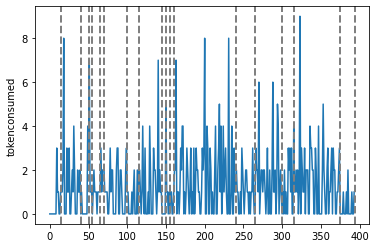

In [15]:
algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['tokenconsumed']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenconsumed")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

[60, 105, 110, 115, 145, 150, 205, 210, 235, 255, 275, 280, 290, 295, 315, 320, 330, 345, 375, 394]


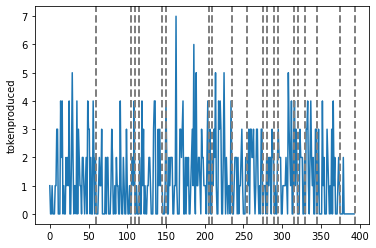

In [16]:
algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['tokenproduced']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenproduced")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


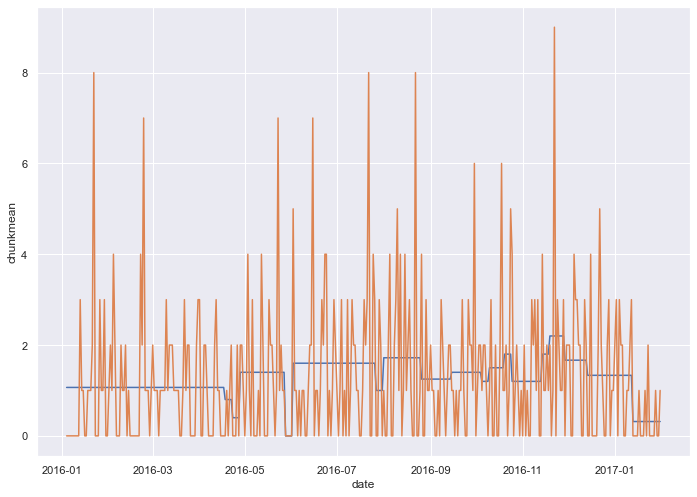

In [18]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['chunkmean'] = 0
targetdatedataframe['chunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['chunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenconsumed'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['chunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='chunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenconsumed')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [36]:
def categorise(row):   
    if row['chunkmean'] < row['tokenconsumed'] and row['tokenconsumed']>1 :
        return 1
    return 0

targetdatedataframe['chunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['chunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['chunkbatched']>0].sort_values(by='date')
batcheddf

132


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched
9,2016-01-13,3,3,4,19 days 22:20:50.710000,7,"['Application_220286199', 'Application_2078253...",1.066667,1,1
17,2016-01-21,0,2,10,74 days 18:33:49.421000,12,"['Application_127178924', 'Application_1014301...",1.066667,1,1
18,2016-01-22,1,8,3,76 days 12:12:08.487000,11,"['Application_805084701', 'Application_1732998...",1.066667,1,1
22,2016-01-26,1,3,3,54 days 07:05:38.228000,6,"['Application_1191408306', 'Application_761959...",1.066667,1,1
25,2016-01-29,4,3,5,63 days 09:51:54.163000,8,"['Application_1192470411', 'Application_146041...",1.066667,1,1
...,...,...,...,...,...,...,...,...,...,...
367,2017-01-05,1,2,7,116 days 05:39:20.085000,9,"['Application_453816713', 'Application_1932580...",1.333333,19,1
368,2017-01-06,2,2,7,122 days 01:51:59.435000,9,"['Application_812090672', 'Application_1201359...",1.333333,19,1
373,2017-01-11,2,2,6,88 days 09:43:03.275000,8,"['Application_1746250121', 'Application_130094...",1.333333,19,1
374,2017-01-12,1,3,4,92 days 07:07:45.669000,7,"['Application_1101048882', 'Application_144693...",1.333333,19,1


C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


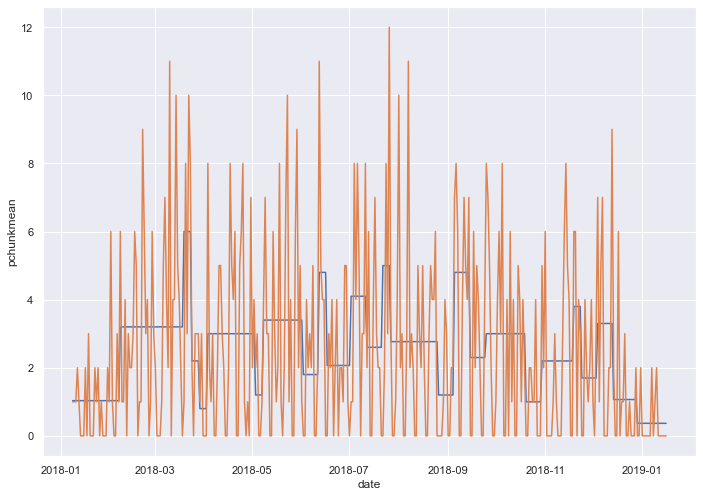

In [65]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['pchunkmean'] = 0
targetdatedataframe['pchunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['pchunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenproduced'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['pchunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='pchunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenproduced')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [67]:
def categorise(row):   
    if row['pchunkmean'] < row['tokenproduced'] and row['tokenproduced']>1 :
        return 1
    return 0

targetdatedataframe['pchunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['pchunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['pchunkbatched']>0].sort_values(by='date')
batcheddf

150


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched,pchunkmean,pchunkindex,pchunkbatched
3,2018-01-11,2,0,5,3 days 06:56:00,5,[],1.063158,1,0,1.033333,1,1
8,2018-01-16,2,0,8,30 days 18:44:00,8,[],1.063158,1,0,1.033333,1,1
10,2018-01-18,3,0,11,45 days 02:46:00,11,[],1.063158,1,0,1.033333,1,1
14,2018-01-22,2,0,13,88 days 08:28:00,13,[],1.063158,1,0,1.033333,1,1
16,2018-01-24,2,0,16,113 days 22:43:00,16,[],1.063158,1,0,1.033333,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2018-12-21,3,0,82,2310 days 03:12:00,82,[],0.320000,24,0,1.066667,25,1
354,2018-12-28,2,0,85,2887 days 01:34:00,85,[],0.320000,24,0,1.066667,25,1
357,2018-12-31,2,0,87,3141 days 05:38:00,87,[],0.320000,24,0,0.368421,26,1
364,2019-01-07,2,0,28,739 days 22:04:00,28,[],8.500000,25,0,0.368421,26,1


In [46]:
print(len(batchespm4py))
df = pd.DataFrame(batchespm4py, columns = ['batchingdate'])
pd.set_option('display.max_rows',310)
df['date']=df['batchingdate'].dt.date
df.sort_values(by='batchingdate')
df['date'].nunique()
merged=pd.merge(df,batcheddf,on='date',how='outer')


257


185

In [48]:
pd.set_option('display.max_rows',310)
merged.sort_values(by=['date'])

,batchingdate,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched
257,NaT,2016-01-13,3.0,3.0,4.0,19 days 22:20:50.710000,7.0,"['Application_220286199', 'Application_2078253...",1.066667,1.0,1.0
65,2016-01-21 16:34:37.068,2016-01-21,0.0,2.0,10.0,74 days 18:33:49.421000,12.0,"['Application_127178924', 'Application_1014301...",1.066667,1.0,1.0
182,2016-01-22 08:19:04.324,2016-01-22,1.0,8.0,3.0,76 days 12:12:08.487000,11.0,"['Application_805084701', 'Application_1732998...",1.066667,1.0,1.0
181,2016-01-22 08:51:20.551,2016-01-22,1.0,8.0,3.0,76 days 12:12:08.487000,11.0,"['Application_805084701', 'Application_1732998...",1.066667,1.0,1.0
173,2016-01-25 11:13:22.167,2016-01-25,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
258,NaT,2016-01-26,1.0,3.0,3.0,54 days 07:05:38.228000,6.0,"['Application_1191408306', 'Application_761959...",1.066667,1.0,1.0
259,NaT,2016-01-29,4.0,3.0,5.0,63 days 09:51:54.163000,8.0,"['Application_1192470411', 'Application_146041...",1.066667,1.0,1.0
260,NaT,2016-02-02,5.0,2.0,9.0,84 days 20:32:55.794000,11.0,"['Application_1031669296', 'Application_109696...",1.066667,1.0,1.0
261,NaT,2016-02-04,0.0,4.0,6.0,92 days 03:07:45.098000,10.0,"['Application_891145200', 'Application_3221749...",1.066667,1.0,1.0
262,NaT,2016-02-05,1.0,2.0,5.0,62 days 10:18:02.263000,7.0,"['Application_773469136', 'Application_1730592...",1.066667,1.0,1.0


In [45]:
merged['date'].nunique()

235

In [ ]:
Shared - 82
Pm4py- 185
Statistical- 132


In [21]:
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date']).dt.date